#Question 1: Preprocessing the Dataset (15 points)

1.Load the Spam Ham Detection dataset using Pandas. You can use the pd.read_csv() function to load the data from the CSV file. The v2 column contains the text of each message, and the v1 column contains the label (spam or ham) for each message. You need to use the following encoding to import the csv file correctly: data = pd.read_csv('spam.csv', encoding='latin-1')  (5 points)

In [4]:
import pandas as pd
import tensorflow
tensorflow.__version__

'2.14.0'

In [5]:
df = pd.read_csv('spam.csv', encoding='latin-1')

2.Convert the label data to binary encoding using the map() function in Pandas. Map the value ham to 0 and the value spam to 1. save the labels in a new object called "labels". (5 points)

In [6]:
mapping = {'ham': 0, 'spam': 1}
df['labels'] = df['v1'].map(mapping)

In [7]:
df.head()

,v1,v2,labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
df= df.drop(columns= 'v1')
df.head()

,v2,labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


3.Split the dataset into training and validation sets. Use a 70/30 split for the training/validation data. You can use sklearn for this: from sklearn.model_selection import train_test_split (5 points)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df.drop(columns='labels')  # split into train and test
y = df['labels']

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)

In [12]:
x_train

,v2
2537,That's y we haf to combine n c how lor...
1432,Thanks for ve lovely wisheds. You rock
5161,Lol no. I just need to cash in my nitros. Hurr...
3318,Kay... Since we are out already
709,4mths half price Orange line rental & latest c...
...,...
1336,"Sweet, we may or may not go to 4U to meet carl..."
2760,I dont thnk its a wrong calling between us
4577,Urgent! call 09066350750 from your landline. Y...
1262,"Hungry gay guys feeling hungry and up 4 it, no..."


# Question 2:  Bag of Words approach: (bigrams tokenizer and multi-hot encoding) (45 points)

1.Use the TextVectorization layer in Keras to preprocess the text data. Set the max_tokens parameter to 10,000.  text_vectorization = TextVectorization( ....) (5 points)

In [13]:
from keras.layers import TextVectorization

In [14]:
text_vectorization = TextVectorization(max_tokens=10000,output_mode="multi_hot",ngrams=2)

2.Fit the vectorization layer to the text data in the train set using adapt(). text_vectorization.adapt(....) (5 points)

In [15]:
import numpy as np


In [16]:
text_vectorization.adapt(x_train)

3.Vectorize the X_train and X_val with the text_vectorization you fit in the previous step. You can call them X_train_vectorized and X_val_vectorized. We need to pass this data along with the labels (y_train, y_val) to fit the model. (5 points)

In [17]:
x_train_vectorized = text_vectorization(x_train)
x_val_vectorized = text_vectorization(x_val)

In [18]:
print(x_train_vectorized.shape)
print(x_val_vectorized.shape)

(3900, 10000)
(1672, 10000)


In [19]:
x_train_vectorized

<tf.Tensor: shape=(3900, 10000), dtype=float32, numpy=
array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

4.Construct your Bag of Words model as follows: (10 points)
One hidden layer with 32 nodes.  
Drop out layer with ratio = 0.3  
use an appropriate activation functions for the dense layer and the output layer
use the correct loss function
keep track of the accuracy metric

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


In [21]:
model_checkpoint = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="bag_of_words_best.h5")
callback_list    = [model_checkpoint]

In [22]:
x_train_vectorized

<tf.Tensor: shape=(3900, 10000), dtype=float32, numpy=
array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [23]:
input_shape = x_train_vectorized.shape[1]


In [24]:
input_shape

10000

In [25]:
def build_bow_model(input_shape):
    # Define the model architecture
    inputs = Input(shape=(input_shape,), name='input_layer')
    x = Dense(32, activation='relu', name='hidden_layer')(inputs)
    x = Dropout(0.3, name='dropout_layer')(x)
    outputs = Dense(1, activation='sigmoid', name='output_layer')(x)

    # Create and compile the model
    model = Model(inputs=inputs, outputs=outputs, name='bag_of_words_model')
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [26]:
bow_model = build_bow_model(input_shape)


5.Report the model.summary(). How many parameters does your model have? (5 points)

In [27]:
bow_model.summary()

Model: "bag_of_words_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 10000)]           0         
                                                                 
 hidden_layer (Dense)        (None, 32)                320032    
                                                                 
 dropout_layer (Dropout)     (None, 32)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 320065 (1.22 MB)
Trainable params: 320065 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


There are 320,065 parameters.

6.Fit the model with 50 epochs.  (5 points) (hint:
history = model.fit(X_train_vectorized, y_train,
          validation_data= (X_val_vectorized, y_val),
          epochs=50, (this should be quite fast! 2 minutes for the entire 50 epochs)
          callbacks=callbacks)

In [28]:
print(x_train_vectorized.shape)
print(x_val_vectorized.shape)

(3900, 10000)
(1672, 10000)


In [29]:
history = bow_model.fit(x_train_vectorized, y_train,
                        validation_data=(x_val_vectorized, y_val),
                        epochs=50,
                        callbacks=callback_list)

Epoch 1/50
122/122 [==============================] - 7s 10ms/step - loss: 0.3360 - accuracy: 0.9187 - val_loss: 0.1426 - val_accuracy: 0.9755
Epoch 2/50
 20/122 [===>..........................] - ETA: 0s - loss: 0.1066 - accuracy: 0.9844

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - 1s 8ms/step - loss: 0.0930 - accuracy: 0.9828 - val_loss: 0.0798 - val_accuracy: 0.9833
Epoch 3/50
122/122 [==============================] - 1s 6ms/step - loss: 0.0451 - accuracy: 0.9910 - val_loss: 0.0660 - val_accuracy: 0.9856
Epoch 4/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0267 - accuracy: 0.9951 - val_loss: 0.0631 - val_accuracy: 0.9856
Epoch 5/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0189 - accuracy: 0.9967 - val_loss: 0.0633 - val_accuracy: 0.9862
Epoch 6/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0131 - accuracy: 0.9972 - val_loss: 0.0652 - val_accuracy: 0.9856
Epoch 7/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0101 - accuracy: 0.9987 - val_loss: 0.0640 - val_accuracy: 0.9850
Epoch 8/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0087 - accuracy: 0.9987 - val_loss: 0.0659 - val_accuracy: 0.9850
Epoch 9/50
122/12

7.Plot the epoch-Loss graph and comment on that (for example, where does the model starts overfitting and etc) (5 points)

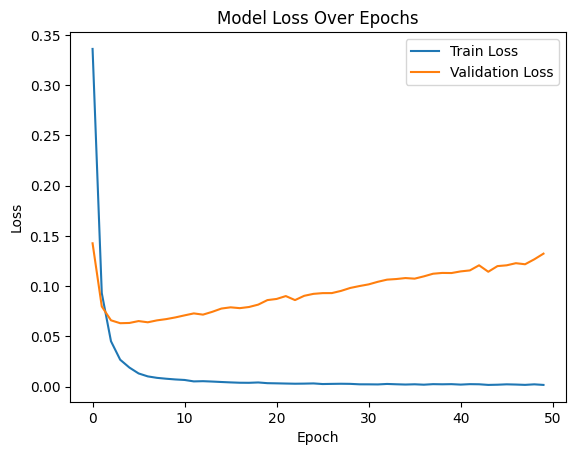

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

It looks like our model starts to overfit at about 3 epochs.

8.Report the accuracy in the validation set for the best model. (you need to load the best model from ModelCheckpoint callback)  (5 points)

In [31]:
from tensorflow.keras.models import load_model

# Load the saved model
best_model = load_model("bag_of_words_best.h5")

# Evaluate the model on the validation set
val_loss, val_accuracy = best_model.evaluate(x_val_vectorized, y_val)

print(f"Validation Accuracy of the Best Model: {val_accuracy:.2f}")

53/53 [==============================] - 0s 3ms/step - loss: 0.0631 - accuracy: 0.9856
Validation Accuracy of the Best Model: 0.99


Our best model had an accuracy of 98.56% and a los of 6.31%.

#Question 3:  Sequence modeling approach:  (word embedding with masking) (45 points)

1.Use the TextVectorization layer in Keras to preprocess the text data. Set the max_tokens parameter to 10,000. Set the output_sequence_length parameter to 1,000.  text_vectorization = TextVectorization( ....) (5 points)

In [32]:
text_vectorization_2 = TextVectorization(max_tokens=10000, output_sequence_length=1000)


2.Fit the vectorization layer to the text data in the train set using adapt(). text_vectorization.adapt(....) (5 points)

In [33]:
text_vectorization_2.adapt(x_train)

3.vectorize the X_train and X_val with the text_vectorization you fit in the previous step. You can call them X_train_vectorized and X_val_vectorized. We need to pass this data along with the labels (y_train, y_val) to fit the model.  (5 points)

In [37]:
x_train_vectorized_2 = text_vectorization_2(x_train)
x_val_vectorized_2 = text_vectorization_2(x_val)

In [38]:
print(x_train_vectorized_2.shape)
print(x_val_vectorized_2.shape)

(3900, 1000)
(1672, 1000)


4.Construct your sequence model as follows: (10 points)
Embedding layer with output_dim=128 and mask_zero=True.
Bidrectional SimpleRNN with 16 nodes
Drop out layer with ratio = 0.3  
use an appropriate activation functions for the output layer
use the correct loss function
keep track of the accuracy metric

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, Dropout, Dense

In [42]:
model_checkpoint_2 = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="seq_best.h5")
callback_list_2    = [model_checkpoint_2]

In [43]:
max_tokens = 10000
sequence_length = 1000

In [46]:
def build_seq_model(max_tokens, sequence_length):
    model = Sequential([
        # Embedding layer with output_dim=128 and mask_zero=True
        Embedding(input_dim=max_tokens, output_dim=128, mask_zero=True, input_length=sequence_length),

        # Bidirectional SimpleRNN with 16 nodes
        Bidirectional(SimpleRNN(16)),

        # Dropout layer with ratio = 0.3
        Dropout(0.3),

        # Output layer with appropriate activation function (e.g., sigmoid for binary classification)
        Dense(1, activation='sigmoid')
    ])

    # Compile the model with binary cross-entropy loss and accuracy metric
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [47]:
seq_model = build_seq_model(max_tokens,sequence_length)

5.Report the model.summary(). How many parameters does your model have? (5 points)

In [48]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 128)         1280000   
                                                                 
 bidirectional (Bidirection  (None, 32)                4640      
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1284673 (4.90 MB)
Trainable params: 1284673 (4.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


There are 1,284,773 parameters.

6.Fit the model with 5 epochs. (5 points) (hint:
history = model.fit(X_train_vectorized, y_train,
          validation_data= (X_val_vectorized, y_val),
          epochs=5, (this is going to take a while, so let's just run it for 5 epochs)
          callbacks=callbacks)

In [49]:
history_2 = seq_model.fit(x_train_vectorized_2, y_train,
                        validation_data=(x_val_vectorized_2, y_val),
                        epochs=5,
                        callbacks=callback_list_2)

Epoch 1/5
122/122 [==============================] - 411s 3s/step - loss: 0.2391 - accuracy: 0.9321 - val_loss: 0.0947 - val_accuracy: 0.9743
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - 369s 3s/step - loss: 0.0504 - accuracy: 0.9892 - val_loss: 0.0735 - val_accuracy: 0.9773
Epoch 3/5
122/122 [==============================] - 364s 3s/step - loss: 0.0193 - accuracy: 0.9967 - val_loss: 0.0729 - val_accuracy: 0.9803
Epoch 4/5
122/122 [==============================] - 361s 3s/step - loss: 0.0151 - accuracy: 0.9977 - val_loss: 0.0622 - val_accuracy: 0.9839
Epoch 5/5
122/122 [==============================] - 355s 3s/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 0.0775 - val_accuracy: 0.9791


7.Plot the epoch-Loss graph and comment on that (for example, where does the model starts overfitting and etc) (5 points)

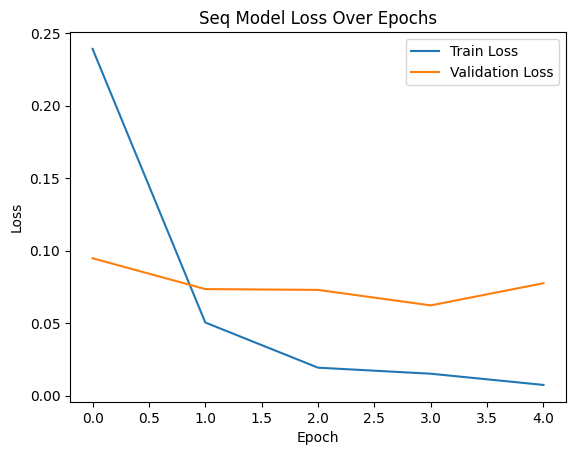

In [50]:
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Seq Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

It starts to overfit a little past 1 epoch.

8.Report the accuracy in the validation set for the best model. (you need to load the best model from ModelCheckpoint callback) (5 points)

In [52]:
# Load the saved model
best_model_2 = load_model("seq_best.h5")

# Evaluate the model on the validation set
val_loss, val_accuracy = best_model_2.evaluate(x_val_vectorized_2, y_val)

print(f"Validation Accuracy of the Best Seq Model: {val_accuracy:.2f}")

53/53 [==============================] - 12s 215ms/step - loss: 0.0622 - accuracy: 0.9839
Validation Accuracy of the Best Seq Model: 0.98


The accuracy was 98.39%

#Question 4: Put Your Model to the Test: Predicting Spam and Ham in Fake Messages (15 points)

Time for some fun! Apply your bag-of-words model to predict whether the following messages are spam or ham.

1. "Congratulations! You have been randomly selected to win a lifetime supply of jokes! Reply 'LOL' to claim your prize."
2. "Hey, I just wanted to let you know that I finally figured out how to make the perfect grilled cheese sandwich. It only took me 20 years and 50 failed attempts, but I did it!"
Report the probabilities of being spam for each message.

In [53]:
test_messages = [
    "Congratulations! You have been randomly selected to win a lifetime supply of jokes! Reply 'LOL' to claim your prize.",
    "Hey, I just wanted to let you know that I finally figured out how to make the perfect grilled cheese sandwich. It only took me 20 years and 50 failed attempts, but I did it!"
]

In [54]:
test_messages_vectorized = text_vectorization(test_messages)

In [55]:
predictions = bow_model.predict(test_messages_vectorized)

1/1 [==============================] - 0s 67ms/step


In [57]:
for i, message in enumerate(test_messages):
    print(f"Message: '{message}'")
    print(f"Probability of being spam: {predictions[i][0]:.4f}\n")

Message: 'Congratulations! You have been randomly selected to win a lifetime supply of jokes! Reply 'LOL' to claim your prize.'
Probability of being spam: 1.0000

Message: 'Hey, I just wanted to let you know that I finally figured out how to make the perfect grilled cheese sandwich. It only took me 20 years and 50 failed attempts, but I did it!'
Probability of being spam: 0.0000



In [58]:
text_vectorization

In [59]:
text_vectorization_2